<a href="https://colab.research.google.com/github/vrishi220/MachineLearning/blob/master/MLhw1prob4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Actual Epoch: 1
Train on 60000 samples, validate on 10000 samples
Epoch 1/1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


 - 2s - loss: 0.9220 - acc: 0.7813 - val_loss: 0.5584 - val_acc: 0.8687

Actual Epoch: 2
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 2s - loss: 0.5174 - acc: 0.8696 - val_loss: 0.4496 - val_acc: 0.8857

Actual Epoch: 3
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 2s - loss: 0.4471 - acc: 0.8821 - val_loss: 0.4048 - val_acc: 0.8926

Actual Epoch: 4
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 2s - loss: 0.4128 - acc: 0.8888 - val_loss: 0.3800 - val_acc: 0.8985

Actual Epoch: 5
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 2s - loss: 0.3914 - acc: 0.8934 - val_loss: 0.3634 - val_acc: 0.9015

Actual Epoch: 6
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 2s - loss: 0.3763 - acc: 0.8968 - val_loss: 0.3513 - val_acc: 0.9052

Actual Epoch: 7
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 2s - loss: 0.3650 - acc: 0.8989 - val_loss: 0.3427 - val_acc: 0.9066

Actual Epoch: 8
Train on 60000 sa

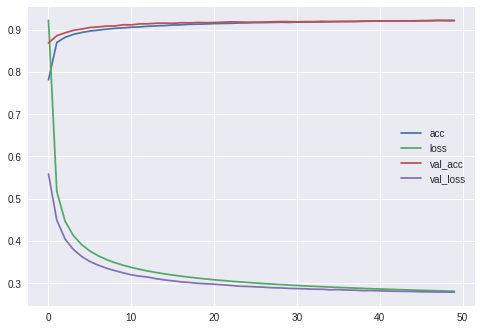

In [6]:
from keras.datasets import mnist
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.utils import np_utils
import matplotlib.pyplot as plt

# Reshape the training and testing data of a single dimension by 28*28. 
# Then the values of the reshaped vector are taken as float32 values for the ease of readability.
# Then the values are divided by 255 (max count for colors) so as to make all values withiin 0 to 1.
def reshapeAndReduce(X,i,): return X.reshape(X.shape[0], i).astype('float32')/255

# Loading mnist data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Setting default variables
output_size, classes_size, num_epoch, batch_size, input_size  = 10, 10, 50, 50, 28**2 

# Reshape the training and test data.
X_train, X_test = reshapeAndReduce(X_train, input_size), reshapeAndReduce(X_test, input_size)

# Convert class vector to binary class matrix, for use with categorical_crossentropy.
Y_train, Y_test = np_utils.to_categorical(y_train, classes_size), np_utils.to_categorical(y_test, classes_size)

# Initialize a Seqquential NN using Keras
model = Sequential()

# Add a dense layer which has a softmax activation function, input dimension of size 28^2 and output size of size 10.
model.add(Dense(output_size, input_dim = input_size, activation = 'softmax'))

# Compilation of the mode utilizing Stochastic Gradient descent, the categorical crossentropy loss function and displaying the accuracy metric.
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Initialize a dictionary which contains an array for the 4 main metrics
fit_history = {'acc':[],'loss':[],'val_acc':[],'val_loss':[]}

# Iterate through each epoch
for i in range(num_epoch):
  
  # Show current epoch
  print('\nActual Epoch: {}'.format(i+1))
  
  # For each epoch train the model against X_train and Y_train and a given test data of X_test and Y_test
  hist = model.fit(X_train, Y_train, batch_size = batch_size, nb_epoch = 1, verbose = 2, validation_data = (X_test, Y_test))
  
  # Push the 4 main updated metrics for each run to the fit history dictionaries. This will be used for building a metric plot.
  for each in fit_history: fit_history[each].append(hist.history[each])

# Print out the final metrics once the model is evaluated against the test data
for i in range(2): print('\nFinal {} of test data: {}%'.format('Loss'if i==0 else 'Accuracy',model.evaluate(X_test, Y_test, verbose = 0)[i]*100))

# Plot the training metrics
for each in fit_history: k = plt.plot(fit_history[each], label=each)

# Show Plot with legend
plt.legend()
  